### Neural Prophet

In [3]:
# !pip install neuralprophet

     -------------------------------------- 104.0/104.0 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 167.3/167.3 MB 4.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0


In [18]:
from neuralprophet import NeuralProphet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from neuralprophet import set_random_seed
set_random_seed(0)

### Quick start

In [6]:
# the data format is the same as in Prophet.
PATH = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"

df = pd.read_csv(PATH + 'wp_log_peyton_manning.csv')

In [8]:
model = NeuralProphet()
metrics = model.fit(df)
# in sample predictions.
forecast = model.predict(df)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 141


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.22E-02, min: 7.63E-01


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.22E-02, min: 5.62E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.62E-02
Epoch[141/141]: 100%|██████████| 141/141 [00:33<00:00,  4.20it/s, SmoothL1Loss=0.00616, MAE=0.347, RMSE=0.484, Loss=0.00472, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [21]:
metrics

,SmoothL1Loss,MAE,RMSE,Loss,RegLoss
0,0.427878,3.620883,4.427964,0.319682,0.0
1,0.328437,3.085089,3.777569,0.244243,0.0
2,0.219357,2.447012,3.004871,0.162190,0.0
3,0.116573,1.756133,2.147108,0.086311,0.0
4,0.050207,1.148258,1.401506,0.037167,0.0
...,...,...,...,...,...
136,0.006187,0.347480,0.485154,0.004740,0.0
137,0.006178,0.348678,0.485560,0.004732,0.0
138,0.006169,0.347598,0.481665,0.004725,0.0
139,0.006163,0.347534,0.484749,0.004720,0.0


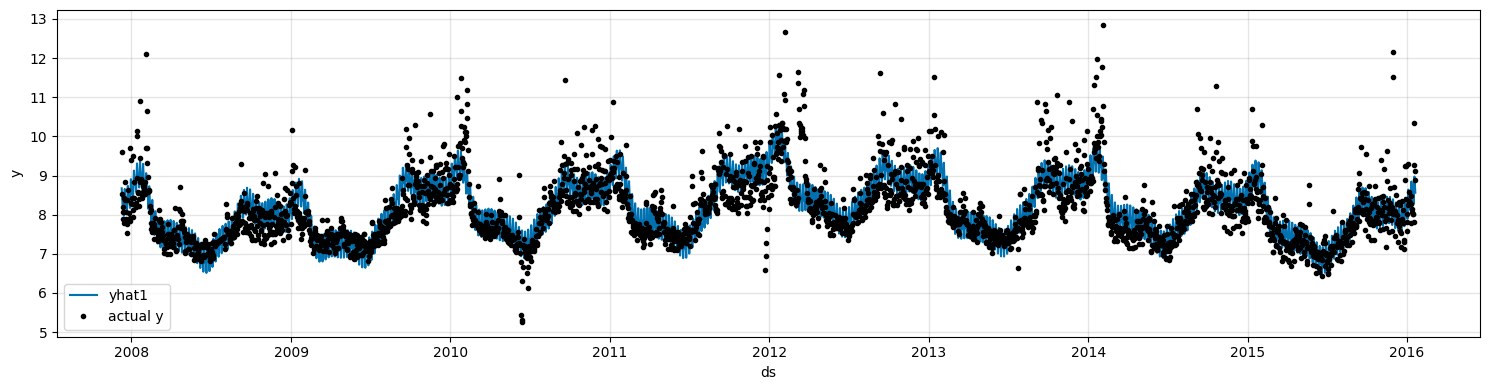

In [11]:
model.plot(forecast, figsize = (15, 4));

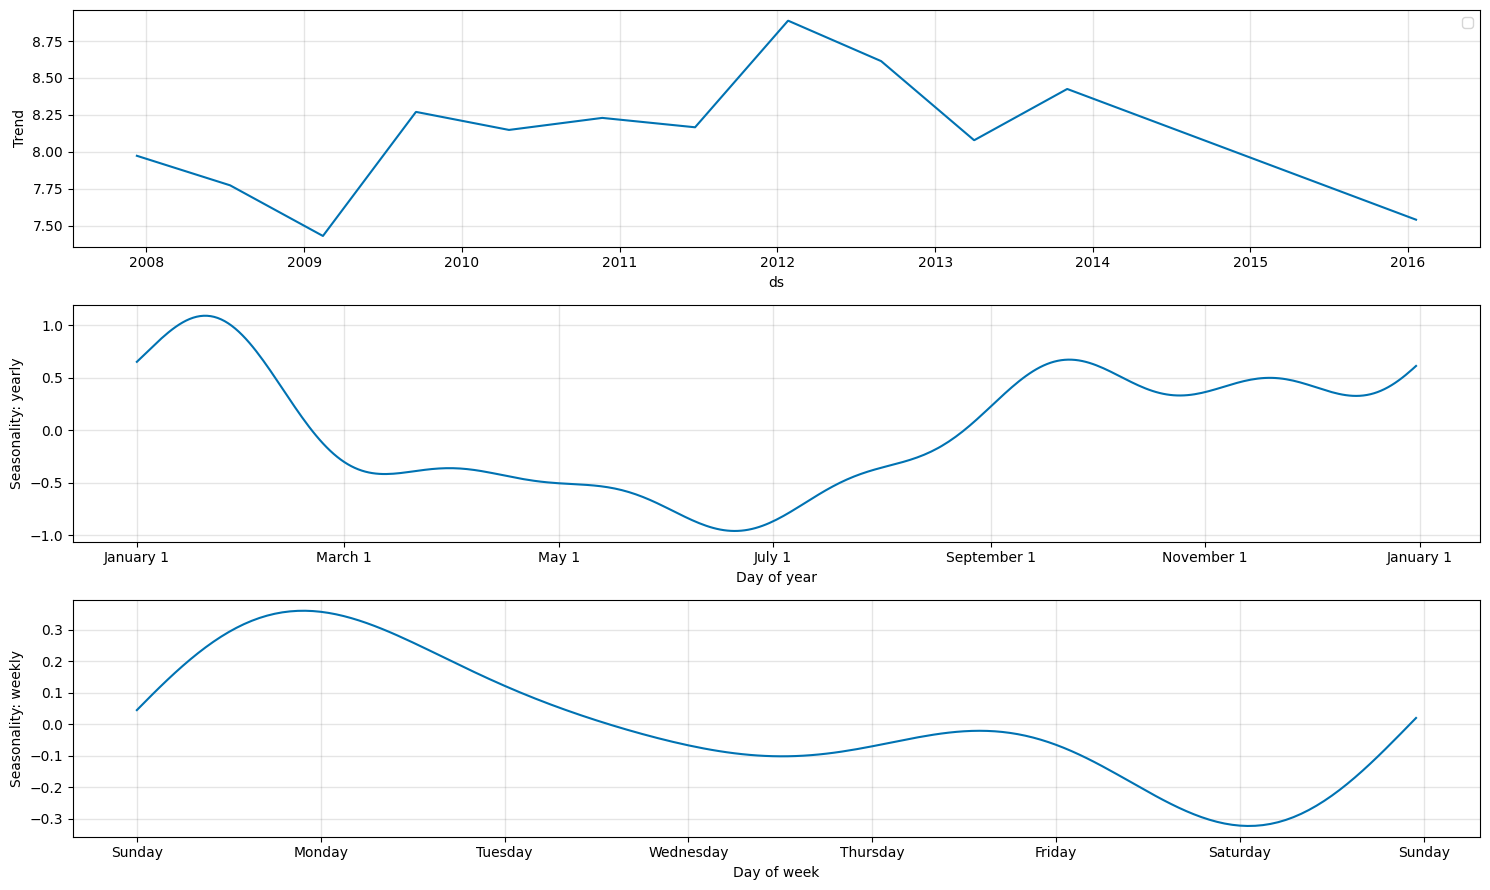

In [14]:
model.plot_components(forecast, figsize = (15, 9));

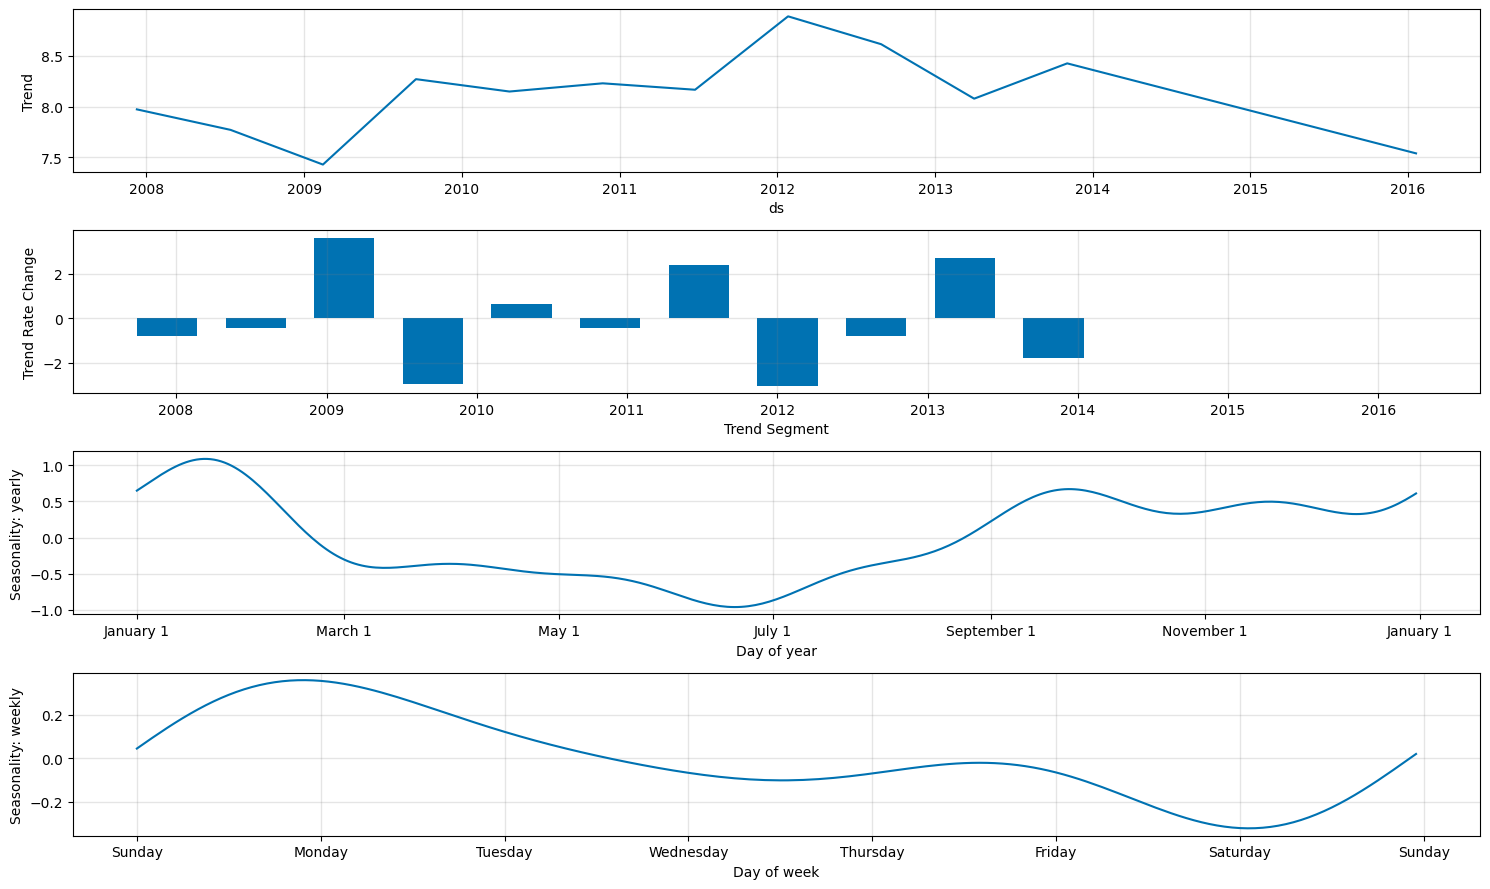

In [20]:
# The individual coefficient values can also be plotted as below to gain further insights.
model.plot_parameters(figsize = (15, 9));

In [25]:
model = NeuralProphet()
df_train, df_val = model.split_df(df, valid_p = 0.2)

train_metrics = model.fit(df_train)
test_metrics = model.test(df_val)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.958% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 150


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.60E-02, min: 6.83E-01


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.65E-02, min: 7.98E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.20E-02
Epoch[150/150]: 100%|██████████| 150/150 [00:29<00:00,  5.04it/s, SmoothL1Loss=0.00597, MAE=0.35, RMSE=0.491, Loss=0.00471, RegLoss=0] 
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.831% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
C:\Users\ravazzil\Anaconda3\envs\github_env\lib\site-packages\torch\nn\modules\loss.py:928: UserWarning: Using a target size (torch.Size([592])) that is different to the input size (torch.Size([592, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.029  0.